# Habits of Successful Students

<img src="https://i.imgur.com/fzDg1JH.png" width=500 align="center">

# Contents
1. [Problem Statement](#1.-Problem-Statement) <br>
2. [What is OULA dataset about?](#2.-What-is-OULA-dataset-about?) <br>
3. [Read this first](#3.-Read-this-first) <br> 
4. [Methodology](#4.-Methodology) <br>
a. [Breakdown of Module Types](#Breakdown-of-Module-Types) <br>
b. [Narrowing focus to Module AAA](#Narrowing-focus-to-Module-AAA) <br>
c. [Finding top activity among students](#Finding-top-activity-among-students) <br> 
d. [Comparing frequency of revision with outcome of grades](#Comparing-frequency-of-revision-with-outcome-of-grades) <br>
e. [Observing trends before final exam](#Observing-trends-before-final-exam) <br>
5. [Future Considerations](#5.-Future-Considerations)  

# 1. Problem Statement

Don't you wish to get better grades in university? Every student has a strategy towards studying for their modules. Some methods include cramming or spacing out the revision of topics covered. This project aims towards studying the patterns of top students in a university and reconfirm existing tips that can help improve learning and score better grades. <br>

# 2. What is OULA dataset about?

Open University Learning Analytics dataset contains information about 22 courses, 32,593 students, their assessment results, and logs of their interactions with the VLE represented by daily summaries of student clicks (10,655,280 entries). The dataset is divided into 7 csv files. 

<img src="https://i.imgur.com/l7PYaV8.png" width=600 align = 'center'>

<b>A thorough explanation of the dataset can be found here:</b> https://analyse.kmi.open.ac.uk/open_dataset#description <p>
<b>Source of data:</b> https://www.kaggle.com/rocki37/open-university-learning-analytics-dataset

### Why I chose this dataset

I always thought about how I could improve the way I study and get better grades in university. There are many books and online courses out there that shares about different methods of studying and how to better retain information. Techniques such as spaced repetition and active recall leads to better long-term learning while cramming,  although highly effective for tests/exams, results in faster forgetting. <p> My goal is to find out whether consistency in work will result in better grades. What are some of the habits that successful students have that allow them to get the grades they want? Are they just plain smarter? What strategy do they use when it comes to studying for an important exam like finals? Do they do anything different from average students? 

# 3. Read this first

It can be quite hard to read code sometimes and to aid you in understanding my code and my process of thinking, <br> 
I have included my <b>explanation and thought process in <font color=green> green </font></b> and <b>weaved my insights and results as # comments or in <font color=blue> blue. </font></b> 

## [Back to top](#Contents) 

# 4. Methodology

In [2]:
# Import relevant libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
vle_df = pd.read_csv('vle.csv')
studentVle_df = pd.read_csv('studentVle.csv')
studentInfo_df = pd.read_csv('studentInfo.csv')
studentRegistration_df = pd.read_csv('studentRegistration.csv')
assessments_df = pd.read_csv('assessments.csv')
courses_df = pd.read_csv('courses.csv')

## Breakdown of Module Types 

### Column Names <br>
<font color=green>

<b>code_module</b> - Total of 7 modules from AAA to GGG. <br> 
<b>code_presentation</b> – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October. <br>
<b>module_presentation_length</b> - length of the module-presentation in days. <br> </font>

<font color=green>Question: What does code_presentation mean? Are there students retaking the same module? Let's find out! </font>

In [3]:
courses_df

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


<font color=green>Viewing the studentRegistration database</font>

In [4]:
studentRegistration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


<font color=green><b>Question</b>: Are there students who take multiple modules in this dataset? (E.g student A takes AAA, BBB and GGG)
<br> We filter for the first student to see if he/she takes more than 1 module.</font>

In [5]:
student_11391 = studentRegistration_df['id_student'] == 11391
filter_AAA = studentRegistration_df['code_module'] == 'AAA'
studentRegistration_df[student_11391]
# student 11391 only registered for 1 module 2013J 
# But what about 2014J?

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN


<font color=green>As we are focusing on Module AAA, let's see if module AAA has any students who took 2013J or 2014J.</font>

In [6]:
module_AAA = studentRegistration_df[filter_AAA]
module_AAA[module_AAA.duplicated(keep=False)]

# From this we can tell that 2013J and 2014J are 2 separate classes for the module AAA 

,code_module,code_presentation,id_student,date_registration,date_unregistration


<font color=green>Let's take a look at the breakdown of assessment type for module AAA <br>
<br>TMA = Tutor Marked Assessment
<br>CMA = Computer Marked Assessment <br>
<br>Over here we can see that the weightage of the assessments are divided to be low weightage at start and then 
<br>progressively higher weightage, exams are treated separately and have the full weight 100% </font>

In [7]:
assessment_breakdown = assessments_df['code_module'] == 'AAA'
module_A = assessments_df[assessment_breakdown]
module_A

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


<font color=green><b>Question:</b> Exactly how many students take Module AAA? </font>

In [8]:
filter_A = studentInfo_df['code_module'] == 'AAA'
module_A_results = studentInfo_df[filter_A]
module_A_results.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [9]:
module_A_results.shape
# From here we discover that there are 748 students who took Module AAA 

(748, 12)

## Narrowing focus to Module AAA 

<font color=green>Now that we know that there are 748 students who take Module AAA, what is the <b>number of students who scored distinction in Module AAA?</b></font>

In [10]:
module_A_results = module_A_results.groupby('final_result')
module_A_results

In [11]:
module_A_results = module_A_results.size()
module_A_results
# Volia! There are 44 students who scored distinction! 

final_result
Distinction     44
Fail            91
Pass           487
Withdrawn      126
dtype: int64

<font color=green>Now let's plot this on a bar graph to show the results</font>

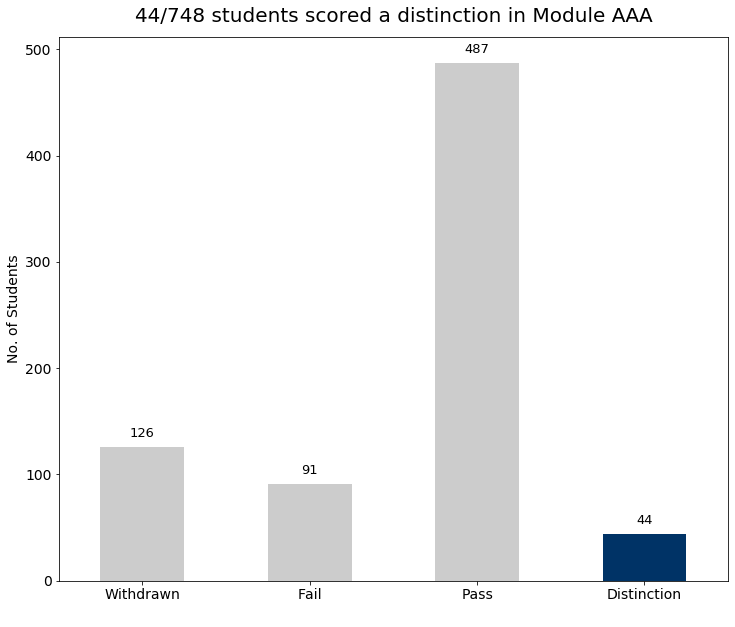

In [12]:
fig= plt.figure(figsize=(12,10))
result_order = ['Withdrawn', 'Fail', 'Pass', 'Distinction']
module_A_results.loc[result_order].plot(kind = 'bar', color = ['#cccccc', '#cccccc', '#cccccc', '#003366'], fontsize=14)

xs = np.arange(4)
ys = np.array([126, 91, 487, 44])

plt.xticks(rotation='horizontal')
plt.xlabel(' ', fontsize=14)
plt.ylabel('No. of Students', fontsize=14)


for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',fontsize=13) # horizontal alignment can be left, right or center
plt.title('44/748 students scored a distinction in Module AAA', loc='center',pad=15, fontsize=20);

## Finding top activity among students 

<font color=green><b>Question:</b> Which activity is the most popular among students taking Module AAA? 
<br>
To answer this question, we first need to filter for Module AAA and left join studentVle.csv with vle.csv, extracting the activity type </font>

In [13]:
filter_A_vle = studentVle_df['code_module'] == 'AAA'
studentVle_df = studentVle_df[filter_A_vle]

studentVle_merge_df = studentVle_df.merge(vle_df[['id_site', 'activity_type']], on='id_site', how='left')
studentVle_merge_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent


In [14]:
overall_activity = pd.DataFrame(studentVle_merge_df.groupby(['activity_type'])['sum_click'].sum()).reset_index()
overall_activity['percentage'] = round(overall_activity['sum_click'] / overall_activity['sum_click'].sum() * 100,2)
overall_activity

,activity_type,sum_click,percentage
0,dataplus,3398,0.27
1,forumng,337103,27.04
2,glossary,656,0.05
3,homepage,266720,21.39
4,oucollaborate,498,0.04
5,oucontent,523394,41.98
6,resource,14924,1.20
7,subpage,71582,5.74
8,url,28377,2.28


<font color=blue> Below, we can see that <b>oucontent</b> (I think it stands for open university content) is the <b>top category for students</b> taking this module. Viewing module content is often the primary reason why we visit an elearning site. <b>Forumng ranks at number 2 at 27%.</b> My guess is that this probably is some discussion forum about the topic that students visit to clarify their doubts or to interact with their lecturers on the online platform. The third ranked page is the homepage which needs no explanation since it is a landing page for the vle(virtual learning environment) 

<font color=green> I used a highlight table and sorted it according to the percentage to find the top 3 activities that students interact with </font>

In [15]:
highlight_table = overall_activity.sort_values('percentage', ascending=False).style.background_gradient(cmap='YlGn')
highlight_table

,activity_type,sum_click,percentage
5,oucontent,523394,41.98
1,forumng,337103,27.04
3,homepage,266720,21.39
7,subpage,71582,5.74
8,url,28377,2.28
6,resource,14924,1.2
0,dataplus,3398,0.27
2,glossary,656,0.05
4,oucollaborate,498,0.04


<font color=green>Now let's plot our results on a horizontal bar graph to show the top accessed materials by students taking Module AAA.
<br>
A horizontal bar graph is suitable in this case as we are ranking the activity types and the length of the labels are easier to read using a hbar graph rather than a vbar graph </font>

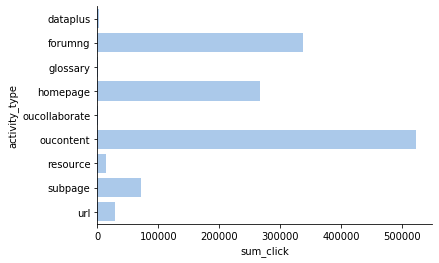

In [16]:
sns.set_color_codes("pastel")
sns.barplot(x="sum_click", y='activity_type', data=overall_activity,
            label="Total", color="b")
sns.despine(top=True)

## Comparing frequency of revision with outcome of grades

<font color=green> To start comparing the students' results with how frequently they interacted with the material, I filtered for students who scored distinction in ```studentInfo_df```. </font>

In [17]:
filter_A_student = studentInfo_df['final_result'] == 'Distinction'
module_A_distinction = pd.DataFrame(studentInfo_df[filter_A_student & filter_A]['id_student'])
module_A_distinction['distinction'] = 'Distinction'
module_A_distinction.head()

,id_student,distinction
43,134143,Distinction
78,187100,Distinction
87,227499,Distinction
115,279572,Distinction
124,291334,Distinction


<font color=green> Here is the tricky part. In order to compare the interaction with their grades, there is a need to <b>left join</b> ```studentVle_df``` (has the data on how frequently student clicked on material) with ```studentInfo_df``` (has data on who scored distinction) </font>

In [18]:
studentVle_merge_df = pd.merge(studentVle_merge_df, module_A_distinction, on='id_student', how='left')
studentVle_merge_df['distinction'].fillna('Non-Distinction', inplace=True)
studentVle_merge_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,distinction
0,AAA,2013J,28400,546652,-10,4,forumng,Non-Distinction
1,AAA,2013J,28400,546652,-10,1,forumng,Non-Distinction
2,AAA,2013J,28400,546652,-10,1,forumng,Non-Distinction
3,AAA,2013J,28400,546614,-10,11,homepage,Non-Distinction
4,AAA,2013J,28400,546714,-10,1,oucontent,Non-Distinction


In [19]:
studentVle_merge_df.shape

(350298, 8)

<font color=green> If we observe the studentVle_merge_df, we will realise that the data has <b>350k rows which are way too many to plot a clear visualization of the data.</b> There is a need to revise the date and categorize them into months/weeks which is what I did below</font>

In [20]:
# Sep Oct Nov Dec Jan Feb Mar Apr May June
def date_revision(date):
    if date <= -1:
        return 'Sep'
    elif date <= 31:
        return 'Oct'
    elif date <= 61:
        return 'Nov'
    elif date <= 92:
        return 'Dec'
    elif date <= 123:
        return 'Jan'
    elif date <= 151:
        return 'Feb'
    elif date <= 179:
        return 'Mar'
    elif date <= 210:
        return 'Apr'
    elif date <= 240:
        return 'May'
    else:
        return 'Jun'
    
def date_number(date):
    if date == 'Sep':
        return 1
    elif date == 'Oct':
        return 2
    elif date == 'Nov':
        return 3
    elif date == 'Dec':
        return 4
    elif date == 'Jan':
        return 5
    elif date == 'Feb':
        return 6
    elif date == 'Mar':
        return 7
    elif date == 'Apr':
        return 8
    elif date == 'May':
        return 9
    else:
        return 10

studentVle_merge_df['revised_date'] = studentVle_merge_df['date'].apply(date_revision)


In [21]:
studentVle_merge_df['date_no'] = studentVle_merge_df['revised_date'].apply(date_number)
studentVle_merge_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,distinction,revised_date,date_no
0,AAA,2013J,28400,546652,-10,4,forumng,Non-Distinction,Sep,1
1,AAA,2013J,28400,546652,-10,1,forumng,Non-Distinction,Sep,1
2,AAA,2013J,28400,546652,-10,1,forumng,Non-Distinction,Sep,1
3,AAA,2013J,28400,546614,-10,11,homepage,Non-Distinction,Sep,1
4,AAA,2013J,28400,546714,-10,1,oucontent,Non-Distinction,Sep,1


In [23]:
distinction = studentVle_merge_df['distinction'] == 'Distinction'
studentVle_merge_A_df = pd.DataFrame(studentVle_merge_df[distinction].groupby(['revised_date','date_no'])['sum_click'].sum())
studentVle_merge_A_df.reset_index(inplace = True)

nodistinction = studentVle_merge_df['distinction'] == 'Non-Distinction'
studentVle_merge_NA_df = pd.DataFrame(studentVle_merge_df[nodistinction].groupby(['revised_date','date_no'])['sum_click'].sum())
studentVle_merge_NA_df.reset_index(inplace = True)
studentVle_merge_NA_df['sum_click'] = round(studentVle_merge_NA_df['sum_click'] / 16)
studentVle_merge_NA_df

,revised_date,date_no,sum_click
0,Apr,8,4732.0
1,Dec,4,4316.0
2,Feb,6,5362.0
3,Jan,5,7007.0
4,Jun,10,1563.0
5,Mar,7,6114.0
6,May,9,7195.0
7,Nov,3,8804.0
8,Oct,2,15925.0
9,Sep,1,6146.0


<font color=green> The above df shows the df comparing the no. of interactions over time in months. However, it is not sequenced in order, that's why we have 'date_no' to sort the values. </font>

In [24]:
studentVle_merge_A_df = studentVle_merge_A_df.sort_values('date_no')
studentVle_merge_NA_df = studentVle_merge_NA_df.sort_values('date_no')

In [25]:
print(studentVle_merge_A_df)
print(studentVle_merge_NA_df)

  revised_date  date_no  sum_click
9          Sep        1      15136
8          Oct        2      31873
7          Nov        3      20631
1          Dec        4      13421
3          Jan        5      18115
2          Feb        6      17961
5          Mar        7      16143
0          Apr        8      13710
6          May        9      21156
4          Jun       10       3864
  revised_date  date_no  sum_click
9          Sep        1     6146.0
8          Oct        2    15925.0
7          Nov        3     8804.0
1          Dec        4     4316.0
3          Jan        5     7007.0
2          Feb        6     5362.0
5          Mar        7     6114.0
0          Apr        8     4732.0
6          May        9     7195.0
4          Jun       10     1563.0


<font color=green> After we have checked both df are neat and tidy, lets plot a graph to observe any trends </font>

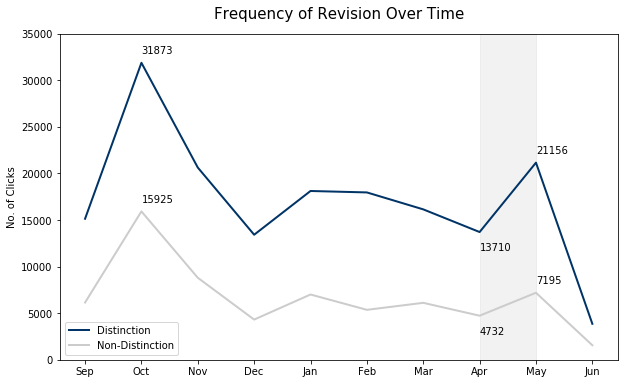

In [26]:
fig= plt.figure(figsize=(10,6)) 
ax1 = plt.plot( 'revised_date', 'sum_click', data=studentVle_merge_A_df, marker='', color='#003366', linewidth=2)
ax2 = plt.plot( 'revised_date', 'sum_click', data=studentVle_merge_NA_df, marker='', color='#cccccc', linewidth=2)
plt.annotate('15925', ('Oct',16925))
plt.annotate('31873', ('Oct',32873))
plt.annotate('13710', ('Apr',11710))
plt.annotate('4732', ('Apr',2732))
plt.annotate('21156', ('May',22156))
plt.annotate('7195', ('May',8195))
plt.yticks(np.arange(0,35001,5000))
plt.axvspan('Apr', 'May', color='#cccccc', alpha=0.25)
plt.legend(labels =['Distinction','Non-Distinction'])
plt.ylabel('No. of Clicks', fontsize=10)
plt.title('Frequency of Revision Over Time', loc='center',pad=15, fontsize=15);

<font color=blue> From the explanation of the dataset, we know that students are given access to the materials in September, that explains why the interaction count is not high. Once the course has kickstarted, we observe that there are a high no. of interactions for all students, the highest in fact. <br> <br> The grey area I highlighted also shows a marked increase in interaction with the material, this is probably due to the final exams that carry a high weightage. As we observe from both lines, the <b>trend for both distinction and non-distinction students are the same! Distinction students revise their material more often than non-distinction students. </b> When the final exam is approaching, there is an increase in intensity of revision too. </font>

<font color=green> Question: But for each distinction and non-distinction student, are there any differences in the interaction? </font>  

<font color=green> Finding the no. of clicks for each student taking Module AAA </font>

In [27]:
new = pd.DataFrame(studentVle_merge_df.groupby(['id_student','distinction'])['sum_click'].sum()).reset_index()
new.shape

(702, 3)

<font color=green> The 44 students who scored distinction are placed into df new2 </font>

In [28]:
new2 = new[new['distinction']=='Distinction']
new2.shape

(44, 3)

In [29]:
new3 = new[new['distinction']=='Non-Distinction']
new3.shape

(658, 3)

<font color=green> Since the no. of non-distinction students outnumber the no. of distinction students, it would be hard to compare the interaction differences between them. As such, we select at random 44 students from the pool of 658 non-distinction students using .sample() </font>

In [30]:
new4 = new3.sample(frac=(44/658), replace=True, random_state=1)

In [31]:
new4.shape

(44, 3)

<font color=green> Concatenating both dfs (non-distinction and distinction students) to plot a scatterplot. </font>

In [32]:
new5 = pd.concat([new4, new2])

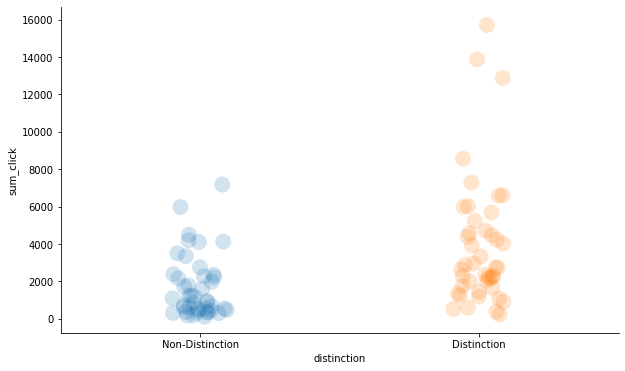

In [33]:
fig= plt.figure(figsize=(10,6)) 
sns.stripplot(x='distinction', y='sum_click', data=new5,   
              size=16, alpha=.2, jitter=True, edgecolor='none')
sns.despine()

<font color=blue> Using the elegant seaborn package, we plot the no. of interactions(clicks) with distinction and non-distinction students. We can observe on the graph that there is a higher tendency for distinction students to revise more than non-distinction students but <b>there is also a fair amount of distinction students who perform better despite revising lesser</b>. The spread of points is wider for distinction students than non-distinction students. </font> 

<font color=green> On average, how much does a distinction student revise more than a non-distinction student? Let's find out by using the data we have from the graph. </font>

In [34]:
new2.groupby('distinction')['sum_click'].sum()/44

distinction
Distinction    3909.318182
Name: sum_click, dtype: float64

In [35]:
new3.groupby('distinction')['sum_click'].sum()/658

distinction
Non-Distinction    1633.194529
Name: sum_click, dtype: float64

In [36]:
round(((3909.318182-1633.194529)/1633.194529*100),2)

139.37

In [37]:
round((3909.318182/1633.194529),2)

2.39

<font color=blue> On average, a distinction student revises the material <b>2.39 times (or 139%)</b> more than an average/below par student</font>

## Observing trends before final exam

<font color=green> We know from the weightage of marks of Module AAA that finals take up 50% of the results. As such, it plays a heavy part in ensuring that distinction students score their As in their modules. As seen in the previous line graph, we notice that there is an increase in interaction towards the final exams. <b> Let's dig deeper to find out if there are any trends we can observe two months leading up to the final exams. </b>

In [38]:
finals = studentVle_merge_df[studentVle_merge_df['date'].between(180,269)]
def week_revision(date):
    if date <= 186:
        return 1
    elif date <= 193 :
        return 2
    elif date <= 200:
        return 3
    elif date <= 207:
        return 4
    elif date <= 214:
        return 5
    elif date <= 221:
        return 6
    elif date <= 228:
        return 7
    elif date <= 235:
        return 8
    elif date <= 242:
        return 9
    elif date <= 249:
        return 10
    elif date <= 256:
        return 11
    elif date <= 263:
        return 12
    else:
        return 13

In [39]:
finals['week'] = studentVle_merge_df['date'].apply(week_revision)
finals.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,distinction,revised_date,date_no,week
138361,AAA,2013J,588775,546614,180,9,homepage,Non-Distinction,Apr,8,1
138362,AAA,2013J,588775,546654,180,1,forumng,Non-Distinction,Apr,8,1
138363,AAA,2013J,588775,546654,180,2,forumng,Non-Distinction,Apr,8,1
138364,AAA,2013J,588775,546650,180,2,forumng,Non-Distinction,Apr,8,1
138365,AAA,2013J,588775,546650,180,3,forumng,Non-Distinction,Apr,8,1


In [40]:
finals_A = finals[studentVle_merge_df['distinction'] == 'Distinction']
finals_B = finals[studentVle_merge_df['distinction'] == 'Non-Distinction']

In [41]:
finals_A = pd.DataFrame(finals_A.groupby(['week'])['sum_click'].sum()).reset_index()
finals_A

,week,sum_click
0,1,4165
1,2,2774
2,3,2418
3,4,2898
4,5,3421
5,6,4182
6,7,5283
7,8,4190
8,9,7465
9,10,1417


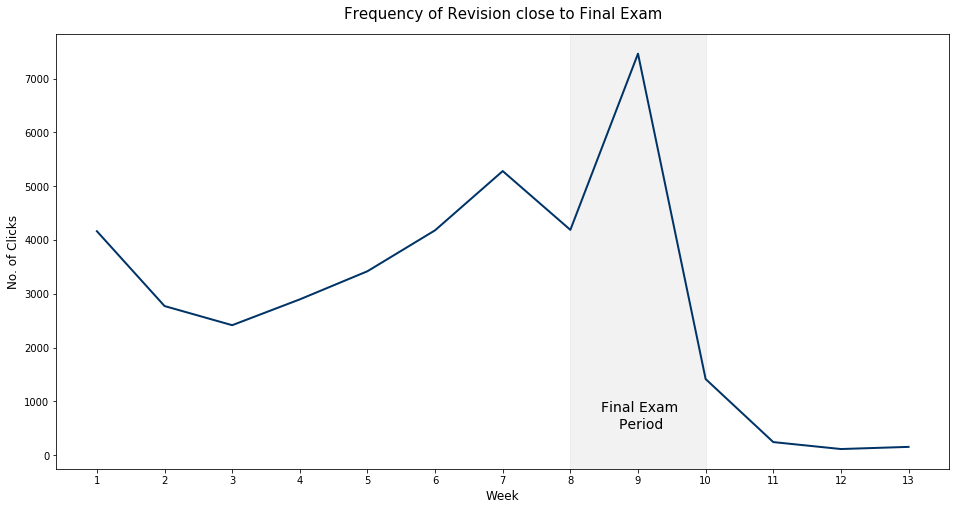

In [42]:
fig= plt.figure(figsize=(16,8)) 
ax1 = plt.plot( 'week', 'sum_click', data=finals_A, marker='', color='#003366', linewidth=2)
plt.xticks(np.arange(1,14,1))
plt.axvspan(8, 10, color='#cccccc', alpha=0.25)
plt.xlabel('Week', fontsize=12)
plt.ylabel('No. of Clicks', fontsize=12)
plt.annotate('Final Exam\n    Period', (8.45,500), fontsize=14)
plt.title('Frequency of Revision close to Final Exam', loc='center',pad=15, fontsize=15);

<font color=blue> Over here, we plot the interaction of activity 3 months before the last day of the module (day 269). An interesting point we can observe from above is <b>the decrease of frequency of revision between week 7 and 8 leading up to the exam period.</b> As the dataset did not mention the date of the final exam, <b>a probable guess would be that the exam period is likely to be between week 8 and 10 (late May or early Jun), seeing how the interaction with the material dropped significantly after week 10. </b>

In [43]:
finals.groupby('activity_type')['sum_click'].sum()

activity_type
dataplus           348
forumng          77858
glossary            96
homepage         56528
oucollaborate       62
oucontent        96783
resource          5265
subpage          13044
url               4594
Name: sum_click, dtype: int64

## [Back to top](#Contents) 

## 5. Future Considerations 

From this project, we discovered that distinction students study a lot harder than non-distinction students as they interacted with the material more. For future considerations, the studentAssessment.csv which includes the grade scores for the individual components before the final exam could be used to predict the probability of scoring a distinction for a module through regression. This prediction could be further extended to gauging the difficulty of the final exam and the amount of time a student should dedicate to the subject with minimum effort and maximum results. I wished to explore further the type of material in this dataset. Unfortunately, they are categorized into categories which are not specific enough to gather insights on any behaviour or material type (lectures, tutorials, online quizzes) that students should focus on to benefit the most.

## [Back to top](#Contents) 